In [1]:
import numpy as np
import math
import sklearn
from sklearn.datasets import make_blobs, load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Regressione Logistica


In questo laboratorio affronteremo la regressione logistica, un modello classificatore tanto semplice quanto popolare. Il dataset che affronteremo è costituito da coppie di numeri reali $x_j=(x_j^1,x_j^2)$ suddivise in due classi $y=0,1$.


In [2]:
def plot_data(X,Y,c1='b',c2='r', toplot=True):
    plt.scatter(X[Y==1, 0], X[Y==1, 1],c=c1, marker='x', label='1')
    plt.scatter(X[Y==0, 0], X[Y==0, 1],c=c2, marker='s', label='0')
    if toplot:
        plt.legend()
        plt.show()

def plot_decision_boundary(X,y, W):
    #Attenti che X, in questa funzione, è espresso con il formalismo X=[x_1,x_2]
    #W invece ha il bias riassorbito, ovvero W=[b,w_1,w_2]
    b=W[0]
    w=W[1:]
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*np.asarray(x1) + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

In [3]:
samples_for_class_1=500
samples_for_class_2=500
STD=0.5

In [4]:
X, y = make_blobs(n_samples=[samples_for_class_1,samples_for_class_2], centers=None, n_features=2,
                   random_state=0,cluster_std=STD)
XT, yT = make_blobs(n_samples=[samples_for_class_1,samples_for_class_2], centers=None, n_features=2,
                   random_state=0,cluster_std=STD)

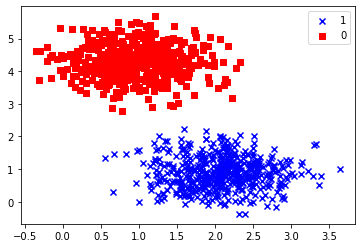

In [5]:
plot_data(X,y)

In [6]:
X.shape

(1000, 2)

In [7]:
y.shape

(1000,)

Lo spazio delle ipotesi della regressione logistica è costituito da un prodotto scalare (come nella regressione lineare) con l'aggiunta di una "attivazione" non lineare, in questo caso una sigmoide.
$$z=XW$$
$$\hat{y}=\sigma(z)$$
$$\sigma(z)=\frac{1}{1+e^{-z}}$$ 
Dove $z$ è lo stesso oggetto sul quale abbiamo lavorato la scorsa volta ma con $d=2$, dunque:
$$X=\begin{pmatrix}
1 & x_1^1 & x_1^2 \\
1 & ... & ... \\
1 & x_i^1 & x_i^2 \\
1 & ... & ... \\
1 & x_N^1 & x_N^2  
\end{pmatrix}$$
e $W \in \mathbb{R}^{3}$:
$$W=[b,m^1,m^2]^T$$  

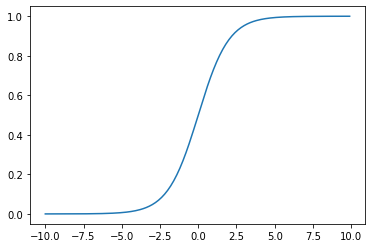

In [8]:
plt.plot(np.arange(-10,10,0.1),[1/(1+(np.exp((-x)))) for x in np.arange(-10,10,0.1)])

Come potete notare, il codominio della sigmoide è compreso tra $0$ ed $1$, possiamo dunque interpretare $\hat{y}$ come la probabilità che una coppia $x_j=(x_j^1,x_j^2)$ appartenga alla classe $1$ e dunque $1-\hat{y}$ rappresenta la probabilità di appartenere alla classe $0$. 
La loss da minimizzare è la binary cross entropy:
$$L(W)=-\frac{1}{N}\sum_1^N[(y_i\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)]$$

## Esercizio 1
Implementa la regressione logistica:
*   Implementa la sigmoide
*   Implementa la derivata di $L$ rispetto a $W$:
$$\partial_W L(W)=\frac{1}{N}\sum_i^N[\hat{y}-y]x_i=X^T[\hat{Y}-Y]$$
*   Implementa il GD, addestra il modello e plotta i risultati



In [ ]:
def forward():
  
  return y_hat

In [ ]:
def grad(X, y, y_hat):
  
    return dw

In [ ]:
def fit(X, y, epochs, lr):

    return W,

In [ ]:
w = fit(X, y, epochs=1000, lr=0.01)
# Plotting Decision Boundary
plot_decision_boundary(X,y, w)

#### Soluzione

In [9]:
def sigmoid(z):
  return 1.0/(1+np.exp(-z))

In [10]:
def grad(X, y, y_hat):
    m = X.shape[0]
    dw = np.dot(X.T, (y_hat - y))
    return dw

In [11]:
def fit(X, y, epochs, lr):
    m, n = X.shape
    X=np.c_[np.ones(len(X)),X]
    y=y.reshape(len(X), 1)
    w = np.zeros((n+1,1))
    
    losses = []
    for epoch in range(epochs):
        y_hat = sigmoid(np.dot(X, w))
        dw = grad(X, y, y_hat)
        w -= lr*dw
    return w

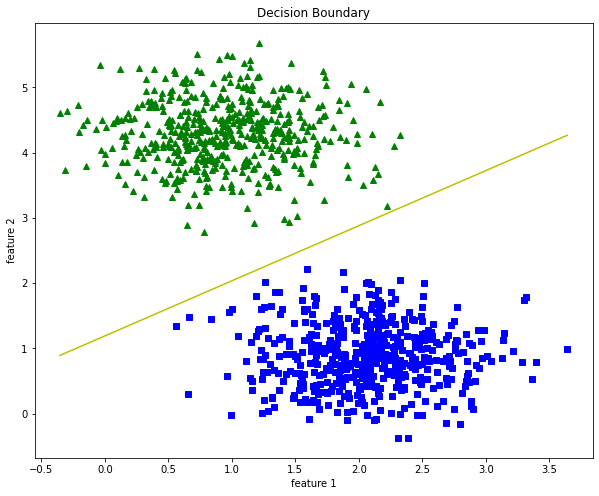

In [13]:
# Training 
w = fit(X, y, epochs=1000, lr=0.01)
# Plotting Decision Boundary
plot_decision_boundary(X,y, w.squeeze())

## Esercizio 2
(se finite in fretta l'esercizio 1 o non avete voglia di farlo)

Esplora la regressione logistica di sklearn: [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


In [14]:
#Importiamo un toy dataset per classificazione binaria
X, y = load_breast_cancer(return_X_y=True)
print(X.shape,y.shape)
#In special modo quando i dataset non sono omegenei, è buona norma normalizzare 
#le features (i.e le colonne del dataset/batch) a media nulla e varianza 1
X=sklearn.preprocessing.normalize(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=137)

(569, 30) (569,)


In [15]:
clf = LogisticRegression() #inizializziamo il modello
clf.fit(X_train, y_train)  #lo addestriamo
accuracy_score(y_test, np.round(clf.predict_proba(X_test)[:, 1])) #testiamo l'accuracy sul test set

0.7074468085106383

# Metriche

Un ruolo cruciale nel machine learning viene svolto dalle "metriche" utilizzate per misurare le performance e stimare l'errore dei modelli. Nel caso dei classificatori la più popolare ed immediata è l'accuracy, ovvero la frazione delle label corrette. Esistono però altre metriche in grado di fornire più informazioni sul classificatore: 


*   Precision: misura la capacità di un classificatore di non classificare come "1" campioni appartenenti alla classe "0".
*   Recall: misura l'abilità di un classificatore di trovare tutti i campioni classificati come "1".
*   Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)
*   Look: [https://scikit-learn.org/stable/modules/model_evaluation.html](https://scikit-learn.org/stable/modules/model_evaluation.html)
 

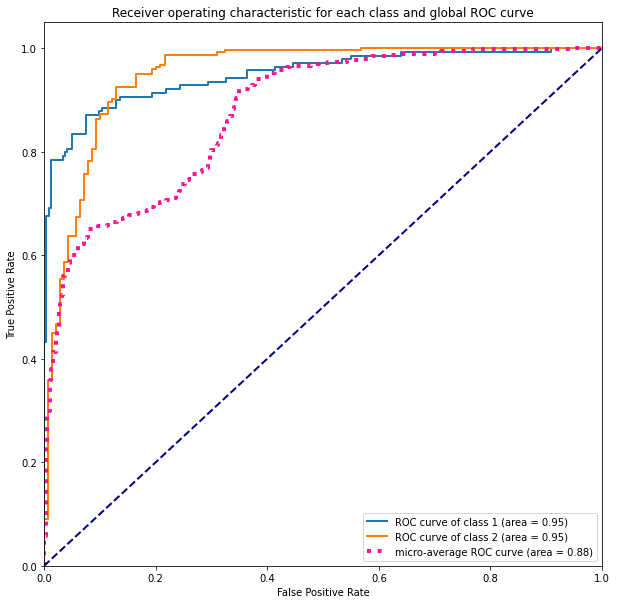

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_train_bin = np.array([[1,0] if i == 0 else [0,1] for i in y_train])
y_score = clf.predict_proba(X_train)
n_classes = 2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_train_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(10,10))
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i+1, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for each class and global ROC curve')
plt.legend(loc="lower right")
plt.show()


## Precision-recall curve

Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

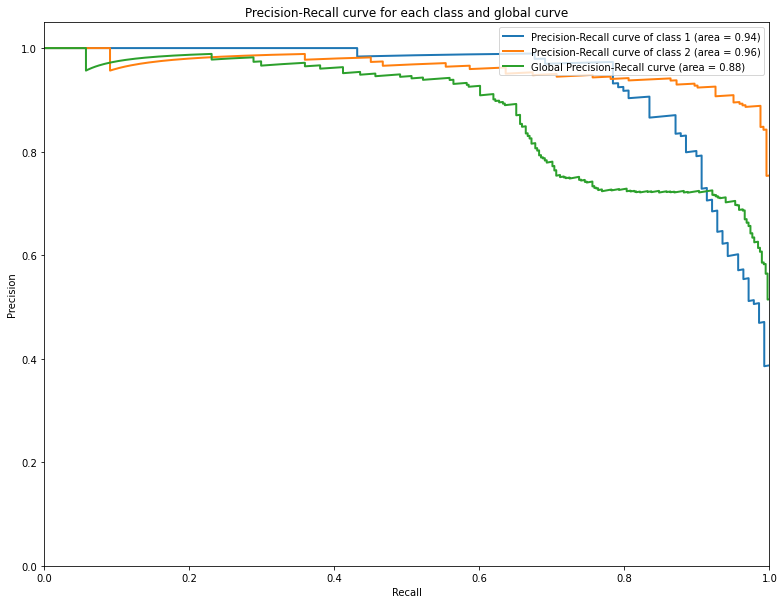

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize

y_train_bin = np.array([[1,0] if i == 0 else [0,1] for i in y_train])
y_score = clf.predict_proba(X_train)
n_classes = 2
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_train_bin[:, i], y_score[:, i])
    average_precision[i] = auc(recall[i], precision[i])

# Global Precision-Recall curve
y_train_bin_global = y_train_bin.ravel()
y_score_global = y_score.ravel()
precision_global, recall_global, _ = precision_recall_curve(y_train_bin_global, y_score_global)
average_precision_global = auc(recall_global, precision_global)

plt.figure(figsize=(13,10))
lw = 2
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=lw, label='Precision-Recall curve of class {0} (area = {1:0.2f})'.format(i+1, average_precision[i]))
plt.plot(recall_global, precision_global, lw=lw, label='Global Precision-Recall curve (area = {0:0.2f})'.format(average_precision_global))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for each class and global curve')
plt.legend(loc="upper right")
plt.show()


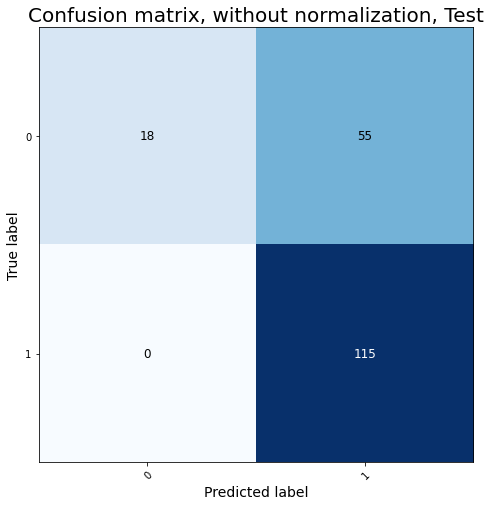

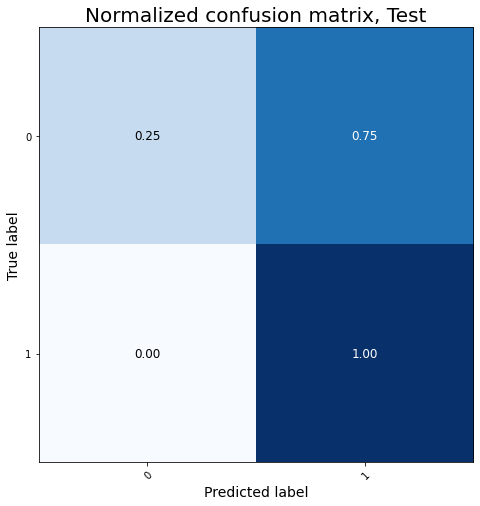

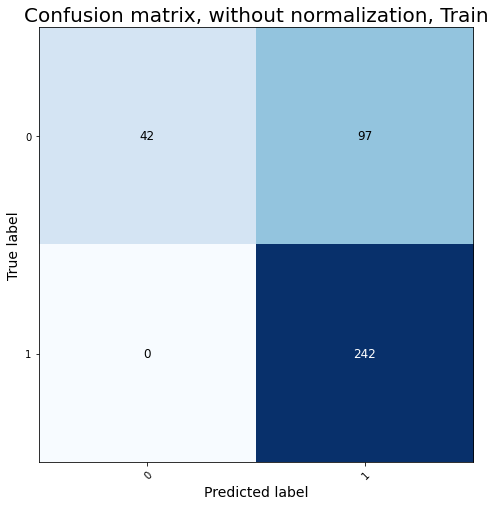

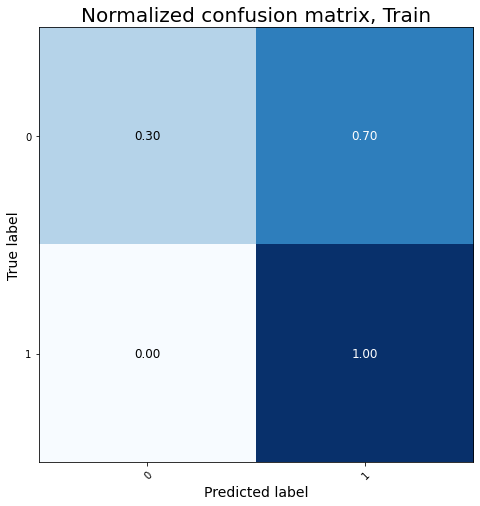

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_test, y_pred_test, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized (on predicted) confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    # Only use the labels that appear in the data
    classes = unique_labels(y_test, y_pred_test)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')
        pass

    #print(cm)

    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    ax.xaxis.get_label().set_fontsize(14)
    ax.yaxis.get_label().set_fontsize(14)
    ax.set_title(title,fontsize=20)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black", fontsize=12)
    #fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

class_names = [1,2]

y_res_test = clf.predict(X_test)
plot_confusion_matrix(y_test, y_res_test, classes=class_names,
                      title='Confusion matrix, without normalization, Test')
plot_confusion_matrix(y_test, y_res_test, classes=class_names, normalize=True,
                      title='Normalized confusion matrix, Test')

y_res_train = clf.predict(X_train)
plot_confusion_matrix(y_train, y_res_train, classes=class_names,
                      title='Confusion matrix, without normalization, Train')
plot_confusion_matrix(y_train, y_res_train, classes=class_names, normalize=True,
                      title='Normalized confusion matrix, Train')

plt.show()


In [19]:
from sklearn.metrics import *

y_res_test = clf.predict(X_test)

print('\n','='*20, 'Regression metrics', '='*20,'\n')

print("Mean Absolute Error: ", mean_absolute_error(y_test, y_res_test))
print("Mean Squared Error: ", mean_squared_error(y_test, y_res_test))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_res_test)))
print("R-squared: ", r2_score(y_test, y_res_test))
print("Explained Variance Score: ", explained_variance_score(y_test, y_res_test))
print("Max Error: ", max_error(y_test, y_res_test))
print("Median Absolute Error: ", median_absolute_error(y_test, y_res_test))
print("Mean Squared Log Error: ", mean_squared_log_error(y_test, y_res_test))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_res_test))

print('\n','='*20, 'Multilabel classification metrics', '='*20,'\n')

print("Hamming Loss: ", hamming_loss(y_test, y_res_test))
print("Jaccard Similarity Score: ", jaccard_score(y_test, y_res_test, average=None))
print("Zero One Loss: ", zero_one_loss(y_test, y_res_test))
print("F1 Score (micro-average): ", f1_score(y_test, y_res_test, average='micro'))
print("F1 Score (macro-average): ", f1_score(y_test, y_res_test, average='macro'))
print("Precision Score (micro-average): ", precision_score(y_test, y_res_test, average='micro'))
print("Precision Score (macro-average): ", precision_score(y_test, y_res_test, average='macro'))
print("Recall Score (micro-average): ", recall_score(y_test, y_res_test, average='micro'))
print("Recall Score (macro-average): ", recall_score(y_test, y_res_test, average='macro'))


 ==================== Regression metrics ==================== 

Mean Absolute Error:  0.2925531914893617
Mean Squared Error:  0.2925531914893617
Root Mean Squared Error:  0.5408818646334537
R-squared:  -0.23168552709946377
Explained Variance Score:  0.12864800476474092
Max Error:  1
Median Absolute Error:  0.0
Mean Squared Log Error:  0.14055806258245254
Mean Absolute Percentage Error:  1317542444177538.8

 ==================== Multilabel classification metrics ==================== 

Hamming Loss:  0.2925531914893617
Jaccard Similarity Score:  [0.25 0.68]
Zero One Loss:  0.29255319148936165
F1 Score (micro-average):  0.7074468085106383
F1 Score (macro-average):  0.6013109697320224
Precision Score (micro-average):  0.7074468085106383
Precision Score (macro-average):  0.8382352941176471
Recall Score (micro-average):  0.7074468085106383
Recall Score (macro-average):  0.6232876712328768


In [20]:
from sklearn.metrics import *

y_res_train = clf.predict(X_train)

print('\n','='*20, 'Regression metrics', '='*20,'\n')

print("Mean Absolute Error: ", mean_absolute_error(y_train, y_res_train))
print("Mean Squared Error: ", mean_squared_error(y_train, y_res_train))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_train, y_res_train)))
print("R-squared: ", r2_score(y_train, y_res_train))
print("Explained Variance Score: ", explained_variance_score(y_train, y_res_train))
print("Max Error: ", max_error(y_train, y_res_train))
print("Median Absolute Error: ", median_absolute_error(y_train, y_res_train))
print("Mean Squared Log Error: ", mean_squared_log_error(y_train, y_res_train))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train, y_res_train))

print('\n','='*20, 'Multilabel classification metrics', '='*20,'\n')

print("Hamming Loss: ", hamming_loss(y_train, y_res_train))
print("Jaccard Similarity Score: ", jaccard_score(y_train, y_res_train, average=None))
print("Zero One Loss: ", zero_one_loss(y_train, y_res_train))
print("F1 Score (micro-average): ", f1_score(y_train, y_res_train, average='micro'))
print("F1 Score (macro-average): ", f1_score(y_train, y_res_train, average='macro'))
print("Precision Score (micro-average): ", precision_score(y_train, y_res_train, average='micro'))
print("Precision Score (macro-average): ", precision_score(y_train, y_res_train, average='macro'))
print("Recall Score (micro-average): ", recall_score(y_train, y_res_train, average='micro'))
print("Recall Score (macro-average): ", recall_score(y_train, y_res_train, average='macro'))


 ==================== Regression metrics ==================== 

Mean Absolute Error:  0.2545931758530184
Mean Squared Error:  0.2545931758530184
Root Mean Squared Error:  0.5045722701982526
R-squared:  -0.09866817289969698
Explained Variance Score:  0.1810452464474701
Max Error:  1
Median Absolute Error:  0.0
Mean Squared Log Error:  0.12232005866158933
Mean Absolute Percentage Error:  1146585731902724.8

 ==================== Multilabel classification metrics ==================== 

Hamming Loss:  0.2545931758530184
Jaccard Similarity Score:  [0.3  0.71]
Zero One Loss:  0.2545931758530183
F1 Score (micro-average):  0.7454068241469817
F1 Score (macro-average):  0.6485674346953718
Precision Score (micro-average):  0.7454068241469817
Precision Score (macro-average):  0.8569321533923304
Recall Score (micro-average):  0.7454068241469817
Recall Score (macro-average):  0.6510791366906474
